# 🧪 PREDIÇÃO DE DESLIZAMENTO USANDO SVM | TESTE

##  Criação do dataset

In [3]:
# Importar bibliotecas

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [37]:
# Importar dataset

deslizamentos_dataset = pd.read_excel(r"C:\Users\Usuário\Desktop\deslizamento_teste.xlsx")
print(deslizamentos_dataset.head()) # mostra as primeiras 5 linhas

   indice_pluviometrico  umidade  temperatura  precipitacao  deslizamento
0                   0.0        2           24             0             0
1                  10.0       10           24             1             0
2                  10.0       13           24             1             0
3                   0.0       10           24             0             0
4                  20.0       27           24             1             0


In [38]:
# Verificar o total de linhas e colunas no dataset

deslizamentos_dataset.shape

(22, 5)

In [39]:
# Descrever dados estatísticos do dataset

deslizamentos_dataset.describe()

,indice_pluviometrico,umidade,temperatura,precipitacao,deslizamento
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,23.578474,42.727273,24.272727,0.727273,0.136364
std,22.696368,28.848012,0.702500,0.455842,0.351250
min,0.000000,2.000000,23.000000,0.000000,0.000000
25%,2.673897,14.250000,24.000000,0.250000,0.000000
50%,17.549442,46.000000,24.000000,1.000000,0.000000
75%,41.054516,67.000000,25.000000,1.000000,0.000000
max,70.000000,89.000000,26.000000,1.000000,1.000000


In [40]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

deslizamentos_dataset['deslizamento'].value_counts()

0    19
1     3
Name: deslizamento, dtype: int64

In [41]:
X = deslizamentos_dataset.drop(columns='deslizamento', axis=1)
Y = deslizamentos_dataset['deslizamento']

In [42]:
print (X)

    indice_pluviometrico  umidade  temperatura  precipitacao
0               0.000000        2           24             0
1              10.000000       10           24             1
2              10.000000       13           24             1
3               0.000000       10           24             0
4              20.000000       27           24             1
5              40.000000       39           24             1
6              50.000000       67           24             1
7              54.000000       79           24             1
8              70.000000       89           24             1
9               0.000000        5           25             0
10             42.763524       46           25             1
11             20.902711       65           25             1
12              0.000000       63           25             0
13              9.530674       70           25             1
14              0.388305       67           24             0
15             64.349826

In [43]:
print(Y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    1
Name: deslizamento, dtype: int64


In [44]:
scaler = StandardScaler() #criação de instância

In [46]:
scaler.fit(X) #fiting de X

StandardScaler()

In [47]:
standarized_data = scaler.transform(X) #transformar data

In [48]:
X = standarized_data #alimentando os dados padronizados para a variável X

In [49]:
print(X)
print(Y)

[[-1.06331277 -1.44501093 -0.39735971 -1.63299316]
 [-0.61234517 -1.1611695  -0.39735971  0.61237244]
 [-0.61234517 -1.05472896 -0.39735971  0.61237244]
 [-1.06331277 -1.1611695  -0.39735971 -1.63299316]
 [-0.16137758 -0.55800645 -0.39735971  0.61237244]
 [ 0.74055761 -0.1322443  -0.39735971  0.61237244]
 [ 1.19152521  0.86120071 -0.39735971  0.61237244]
 [ 1.37191224  1.28696286 -0.39735971  0.61237244]
 [ 2.0934604   1.64176465 -0.39735971  0.61237244]
 [-1.06331277 -1.3385704   1.05962589 -1.63299316]
 [ 0.86518359  0.11611695  1.05962589  0.61237244]
 [-0.12066823  0.79024035  1.05962589  0.61237244]
 [-1.06331277  0.71928     1.05962589 -1.63299316]
 [-0.63351028  0.96764125  1.05962589  0.61237244]
 [-1.04580147  0.86120071 -0.39735971 -1.63299316]
 [ 1.83865586  1.35792322  2.51661148  0.61237244]
 [-1.06331277 -1.37405057 -0.39735971 -1.63299316]
 [-0.11512659 -0.87732807 -0.39735971  0.61237244]
 [-0.61920633 -0.80636771 -1.8543453   0.61237244]
 [ 0.71408716  0.11611695  1.05

In [50]:
#dividindo o conjunto de dados na proporção 80/20 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, random_state=2)

In [51]:
print(X.shape, X_test.shape, X_train.shape)

(22, 4) (5, 4) (17, 4)


## 🦾 Criação do modelo

In [52]:
classifier = svm.SVC(kernel='linear')

In [53]:
# Treinar modelo usando o dataset de teste
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [58]:
# Acurácia nos dados de treinamento
train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(train_pred, Y_train)

In [59]:
print("Pontuação de acurácia dos dados de treinamento = {}".format(accuracy_train))

Pontuação de acurácia dos dados de treinamento = 0.9411764705882353


In [64]:
#Acurácia no dados de teste
test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

In [65]:
print("Pontuação de acurácia dos dados de teste = {}".format(accuracy_test))

Pontuação de acurácia dos dados de teste = 0.8


## 🔮 Sistema de predição

In [66]:
input_data = (200, 80, 24, 1)

# Transformar dados de entrada em um array
data_changed = np.asarray(input_data)

# Remodelar para predição de apenas uma instância
data_reshaped = data_changed.reshape(1,-1)

# Padronizar dados de entrada
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predição com os valores de entrada
prediction = classifier.predict(std_data)
if prediction == 1:
    print ("Vai ocorrer deslizamento")
else:
    print("Não vai ocorrer deslizamento")

[[ 7.95603914  1.32244304 -0.39735971  0.61237244]]
Vai ocorrer deslizamento


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
input_data = (10, 15, 24, 1)

# Transformar dados de entrada em um array
data_changed = np.asarray(input_data)

# Remodelar para predição de apenas uma instância
data_reshaped = data_changed.reshape(1,-1)

# Padronizar dados de entrada
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predição com os valores de entrada
prediction = classifier.predict(std_data)
if prediction == 1:
    print ("Vai ocorrer deslizamento")
else:
    print("Não vai ocorrer deslizamento")

[[-0.61234517 -0.9837686  -0.39735971  0.61237244]]
Não vai ocorrer deslizamento


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
input_data = (0, 86, 25, 0)

# Transformar dados de entrada em um array
data_changed = np.asarray(input_data)

# Remodelar para predição de apenas uma instância
data_reshaped = data_changed.reshape(1,-1)

# Padronizar dados de entrada
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predição com os valores de entrada
prediction = classifier.predict(std_data)
if prediction == 1:
    print ("Vai ocorrer deslizamento")
else:
    print("Não vai ocorrer deslizamento")

[[-1.06331277  1.53532412  1.05962589 -1.63299316]]
Não vai ocorrer deslizamento


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 📊 Outras métricas do modelo

In [79]:
# Importar bibliotecas
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


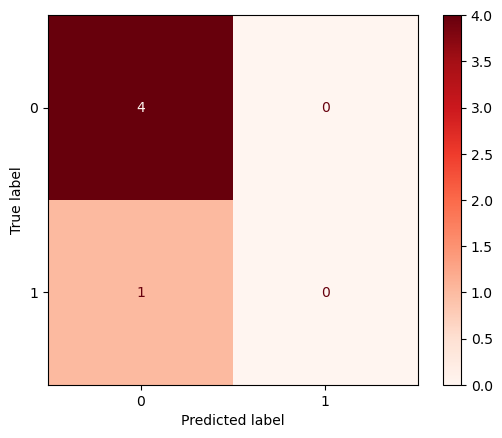

In [101]:
#Matriz de confusão

test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

cm = confusion_matrix(Y_test, test_pred)
plot_confusion_matrix(classifier, X_test, Y_test, cmap=plt.cm.Reds)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


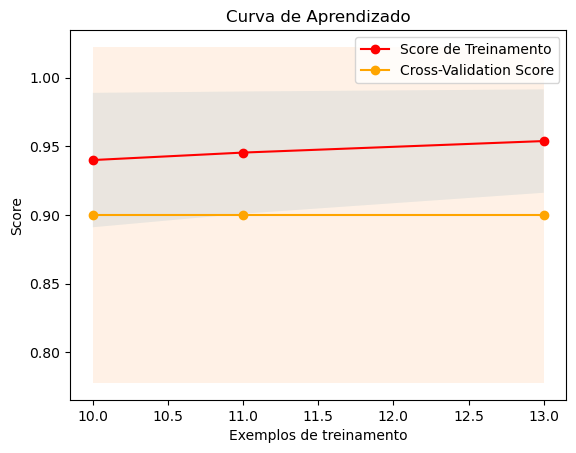

In [103]:
# Curva de aprendizado 

'''
O gráfico mostra como a precisão do modelo melhora à medida que o número de exemplos de treinamento 
aumenta e também mostra se o modelo está sofrendo  overfitting ou underfitting.
'''

train_sizes, train_scores, test_scores = learning_curve(
    svm.SVC(kernel='linear'),
    X_train, Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Curva de Aprendizado')
plt.xlabel('Exemplos de treinamento')
plt.ylabel('Score')

plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Score de Treinamento')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)

plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.legend(loc='best')
plt.show()